In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = "Fruits_Vegetables/Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/Fruits_Vegetables/test"
data_validation_path = "Fruits_Vegetables/Fruits_Vegetables/validation"

In [4]:
img_width = 180
img_height = 180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 3115 files belonging to 36 classes.


In [6]:
data_category = data_train.class_names

In [8]:
data_category

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


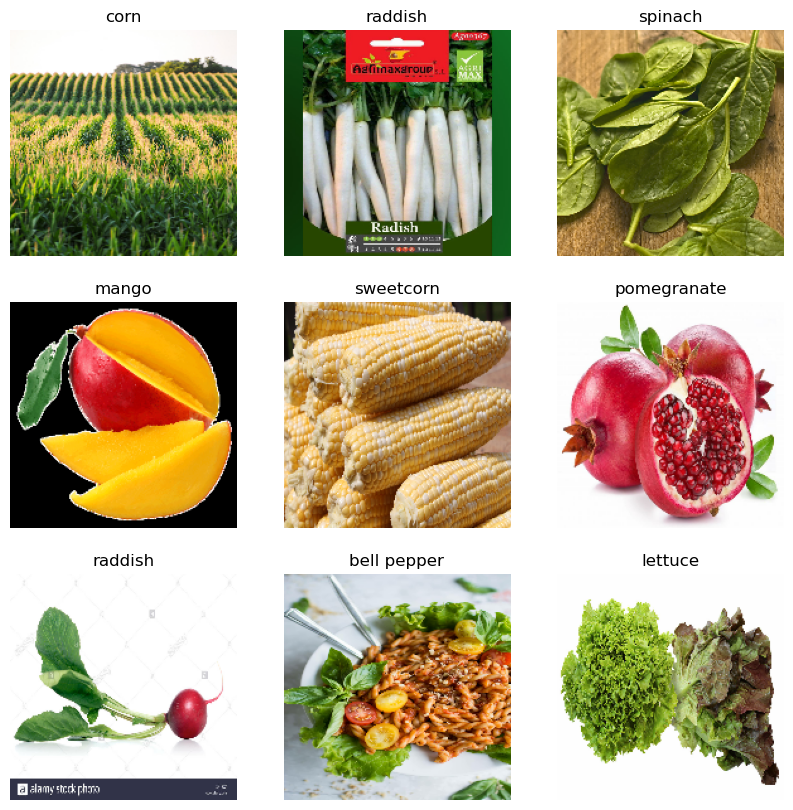

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_category[labels[i]])
        plt.axis("off")

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_category))
    
])

In [15]:
model.compile(optimizer= "adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [16]:
epochs_size = 25
history = model.fit(data_train, validation_data = data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 750ms/step - accuracy: 0.0427 - loss: 4.4436 - val_accuracy: 0.1453 - val_loss: 2.9616
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 481ms/step - accuracy: 0.1415 - loss: 3.0811 - val_accuracy: 0.4444 - val_loss: 2.2670
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 490ms/step - accuracy: 0.3329 - loss: 2.3758 - val_accuracy: 0.6524 - val_loss: 1.3418
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 487ms/step - accuracy: 0.5567 - loss: 1.5677 - val_accuracy: 0.7949 - val_loss: 0.8921
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 493ms/step - accuracy: 0.7299 - loss: 0.9607 - val_accuracy: 0.8803 - val_loss: 0.5976
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 487ms/step - accuracy: 0.8294 - loss: 0.5906 - val_accuracy: 0.8917 - val_loss: 0.4925
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 482ms/step - accuracy: 0.8831 - loss: 0.4265 - val_accuracy: 0.9288 - val_loss: 0.3718
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 489ms/step - accuracy: 0.9146 - loss: 0.3242 - val_accu

Text(0.5, 1.0, 'Loss')

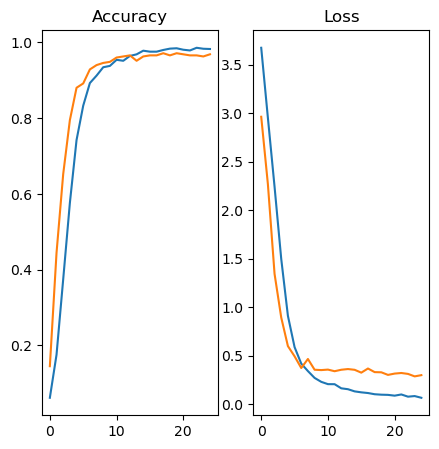

In [19]:
epochs_range = range(epochs_size)
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history["accuracy"], label = "Training Accuracy")
plt.plot(epochs_range, history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history["loss"], label = "Training Loss")
plt.plot(epochs_range, history.history["val_loss"], label = "Validation loss")
plt.title("Loss")

In [26]:
image = "carrot.jpg"
image = tf.keras.utils.load_img(image, target_size = (img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [27]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [28]:
score = tf.nn.softmax(predict)

In [29]:
print("Vegetable/Fruit in image is {} with accuracy of {:0.2f}".format(data_category[np.argmax(score)], np.max(score) * 100))

Vegetable/Fruit in image is carrot with accuracy of 99.51


In [30]:
model.save("Image_Classifying.keras")